In [1]:
#import the required libraries
import csv
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#Open the logfile
#Open an existing file if you want:
df = pd.read_csv('portalLog.csv',encoding='cp1252')

In [3]:
#Convert date column to datetime
df['download_date']=pd.to_datetime(df['download_date'])

In [4]:
df['descriptor'].unique()

array(['assetTypes', 'assetCategories', 'availableMetadataComplete',
       'coreMetadataComplete', 'median', 'mean', 'standardDeviation'],
      dtype=object)

In [5]:
#Dataset is in the 'long format' https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77
#Might be able to use 'groupby' to make the charts as well, without pivoting
#To make charting easier, pivot it, by descriptor
dftype = df[df['descriptor']=='assetTypes']
dftype = dftype.pivot(index='download_date',columns='unit', values='value')

dfcat = df[df['descriptor']=='assetCategories']
dfcat = dfcat.pivot(index='download_date',columns='unit', values='value')

dfavmeta = df[df['descriptor']=='availableMetadataComplete']
dfavmeta = dfavmeta.pivot(index='download_date',columns='unit', values='value')

dfcometa = df[df['descriptor']=='coreMetadataComplete']
dfcometa = dfcometa.pivot(index='download_date',columns='unit', values='value')

dfmedian = df[df['descriptor']=='median']
dfmedian = dfmedian.pivot(index='download_date',columns='unit', values='value')

dfmean = df[df['descriptor']=='mean']
dfmean = dfmean.pivot(index='download_date',columns='unit', values='value')



In [8]:
#dfcat['download_date'][:-1]
#dfcat['download_date']
#plt.plot(dfcat['download_date'], dfcat['Agriculture'], marker='', color='grey', linewidth=0.6, alpha=0.3)

# Plot trends for all categories

In [8]:
dfcat.reset_index(inplace=True)

In [9]:
dfcat.drop(columns=['index'], inplace=True)

In [13]:
dfcat.head(5)

unit,download_date,Agriculture,Consumer Protection,Culture and Community,Demographics,Economics,Education,Employment,Health,Labor,Natural Resources & Environment,No Value,Politics,Procurements and Contracts,Public Safety,Recreation,Transportation
0,2019-08-05 00:00:00.000000,1.0,26.0,NaN,47.0,53.0,486.0,6.0,663.0,32.0,413.0,799.0,35.0,33.0,41.0,8.0,10.0
1,2019-09-16 00:00:00.000000,1.0,31.0,6.0,47.0,52.0,475.0,6.0,679.0,32.0,398.0,763.0,36.0,33.0,41.0,8.0,8.0
2,2019-10-27 00:00:00.000000,1.0,32.0,9.0,47.0,50.0,472.0,6.0,683.0,32.0,398.0,754.0,36.0,34.0,41.0,8.0,8.0
3,2020-04-29 08:41:46.639651,1.0,35.0,23.0,48.0,49.0,515.0,7.0,812.0,32.0,406.0,815.0,37.0,36.0,42.0,8.0,9.0
4,2020-07-14 17:42:34.728536,1.0,37.0,25.0,52.0,50.0,519.0,7.0,836.0,32.0,407.0,819.0,37.0,37.0,42.0,8.0,12.0


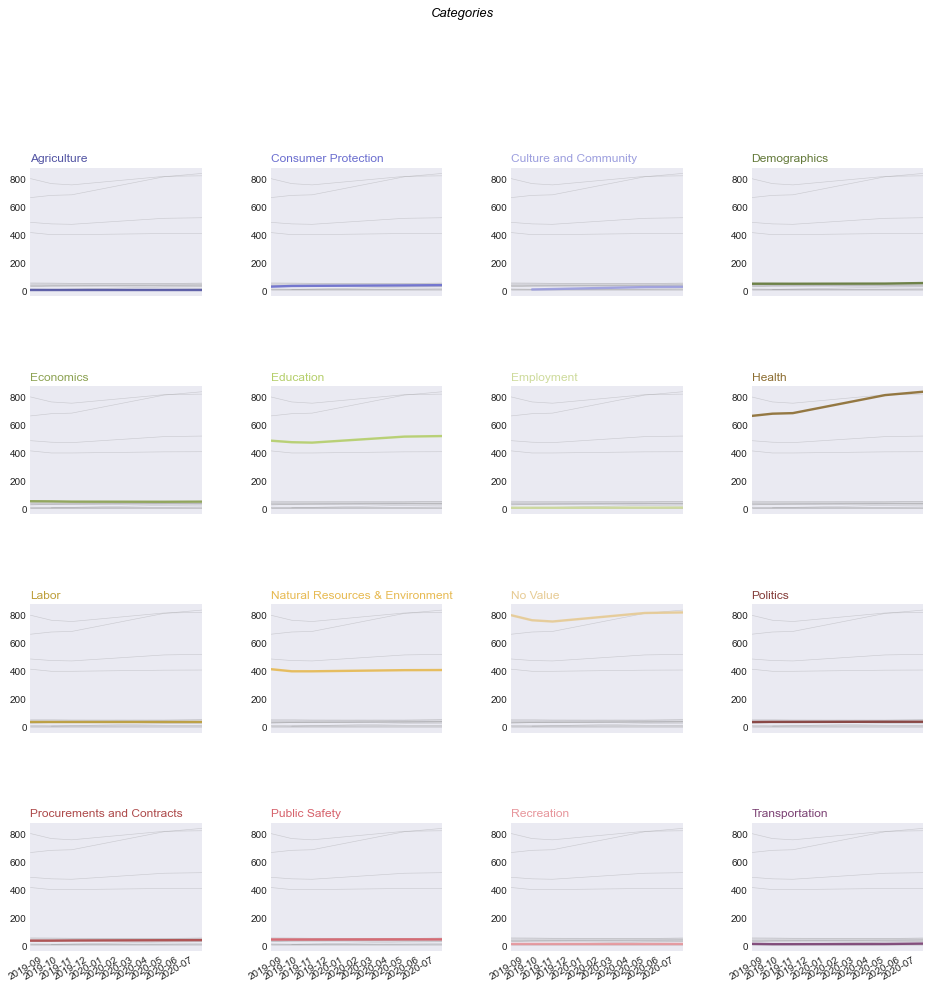

In [11]:
#Graph all the variables against time https://python-graph-gallery.com/125-small-multiples-for-line-chart/
#https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html


plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = [16,16]

# create a color palette
palette = plt.get_cmap('tab20b')

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.4)


# multiple line plot
num=0
for column in dfcat.drop('download_date', axis=1): #I think this drop is to get rid of the x axis vlaues
    num+=1
    
    # Find the right spot on the plot
    plt.subplot(4,4, num)
    #plt.axes().set_aspect('equal')
    
    # plot every groups, but discreet
    for v in dfcat.drop('download_date', axis=1):
        plt.plot(dfcat['download_date'], dfcat[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(dfcat['download_date'], dfcat[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for everybody!
#    plt.xlim(0,10)
#    plt.ylim(0,2000)
    
    datemin = dfcat['download_date'][:1]
    datemax = dfcat['download_date'][-1:]
    plt.xlim(datemin, datemax)
    plt.grid(False)
    plt.xticks()  #Might be able to use this to get fewer dates on the x axis
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("Categories", fontsize=13, fontweight=0, color='black', style='italic', y=0.9)



# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

# Axis title
#plt.text(0.5, 0.02, 'Time', ha='center', va='center')
#plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

In [29]:
df.head(1)

,download_date,descriptor,unit,value
0,2019-08-05,assetTypes,dataset,894.0


### Use seaborn facet grid to do the same thing

In [15]:
#Set up the dataframe
cats=df[df['descriptor']=='assetCategories']
cats['max'] = cats.groupby('unit')['value'].transform('max')
cats.head(5)

<ipython-input-15-df254021e35b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cats['max'] = cats.groupby('unit')['value'].transform('max')


,download_date,descriptor,unit,value,max
12,2019-08-05,assetCategories,No Value,799.0,819.0
13,2019-08-05,assetCategories,Health,663.0,836.0
14,2019-08-05,assetCategories,Education,486.0,519.0
15,2019-08-05,assetCategories,Natural Resources & Environment,413.0,413.0
16,2019-08-05,assetCategories,Economics,53.0,53.0


In [17]:
catsmajor = cats.loc[cats['max'] > 200]
catsminor = cats.loc[cats['max'] <= 200]
catsmajor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 12 to 223
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   download_date  20 non-null     datetime64[ns]
 1   descriptor     20 non-null     object        
 2   unit           20 non-null     object        
 3   value          20 non-null     float64       
 4   max            20 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 960.0+ bytes


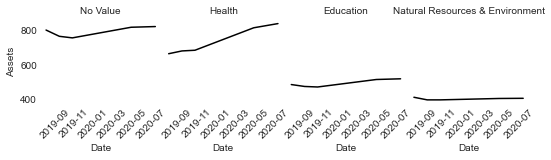

In [38]:
#Chart Major Categories
with sns.axes_style("ticks"):
    g = sns.FacetGrid(catsmajor, col="unit", margin_titles=True, col_wrap=4, height=2)
g.map(sns.lineplot, "download_date", "value", color='#000000')
g.set_axis_labels("Date", "Assets")
g.set_xticklabels(rotation=45)
g.set_titles('{col_name}')
g.fig.subplots_adjust(wspace=.02, hspace=.12)

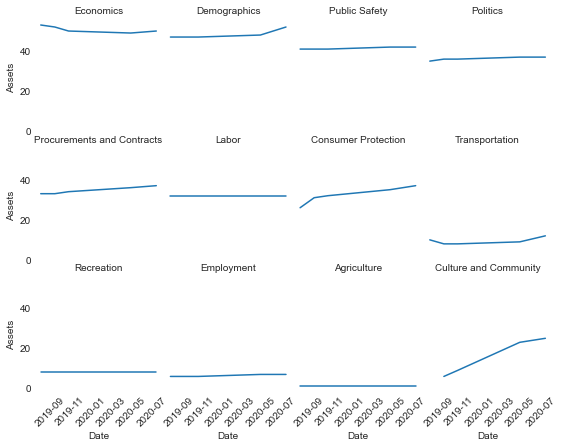

In [39]:
#Chart Minor Categories
with sns.axes_style("ticks"):
    g = sns.FacetGrid(catsminor, col="unit", margin_titles=True, col_wrap=4, height=2)
g.map(sns.lineplot, "download_date", "value")
g.set_axis_labels("Date", "Assets")
g.set_xticklabels(rotation=45)
g.set_titles('{col_name}')
g.fig.subplots_adjust(wspace=.02, hspace=.12)

# Plot trends for all types

In [8]:
dftype.columns

Index(['calendar', 'chart', 'datalens', 'dataset', 'federated_href', 'file',
       'filter', 'form', 'href', 'map', 'story', 'visualization'],
      dtype='object', name='unit')

In [47]:
dftype.reset_index(inplace=True)

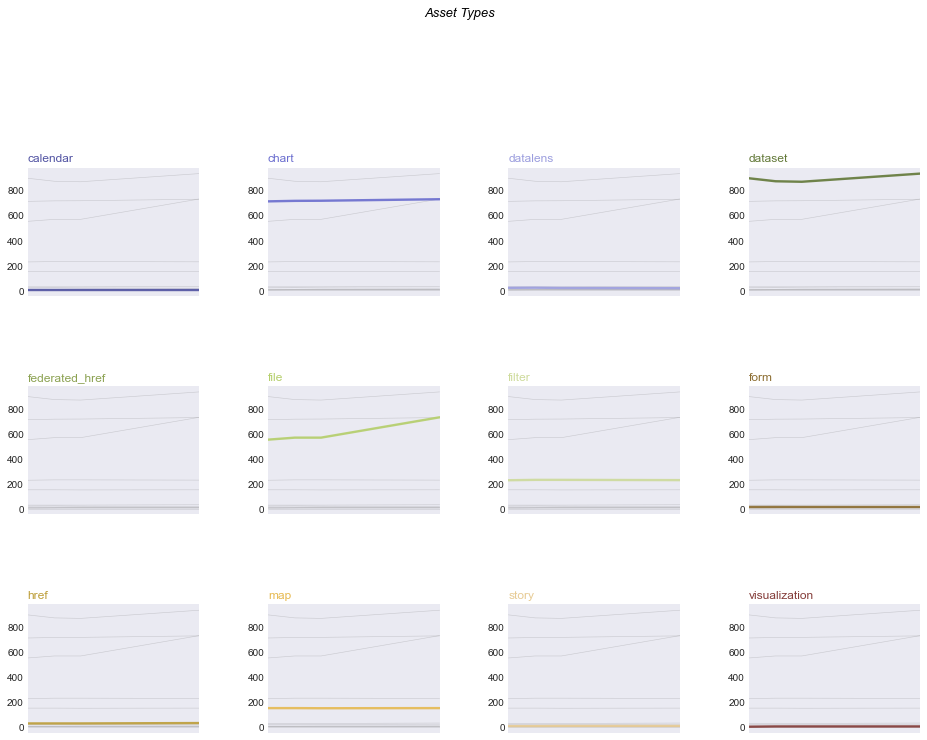

In [48]:
#Graph all the variables against time https://python-graph-gallery.com/125-small-multiples-for-line-chart/


plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = [16,16]
# create a color palette
palette = plt.get_cmap('tab20b')


fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.4)

 
# multiple line plot
num=0
for column in dftype.drop('download_date', axis=1): #I think this drop is to get rid of the x axis vlaues
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(4,4, num)
 
    # plot every groups, but discreet
    for v in dftype.drop('download_date', axis=1):
        plt.plot(dftype['download_date'], dftype[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(dftype['download_date'], dftype[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    datemin = dftype['download_date'][:1]
    datemax = dftype['download_date'][-1:]
    plt.xlim(datemin, datemax)
    plt.grid(False)
    plt.xticks()  #Might be able to use this to get fewer dates on the x axis
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("Asset Types", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

## Plot the number of datasets and number of core metadata elements

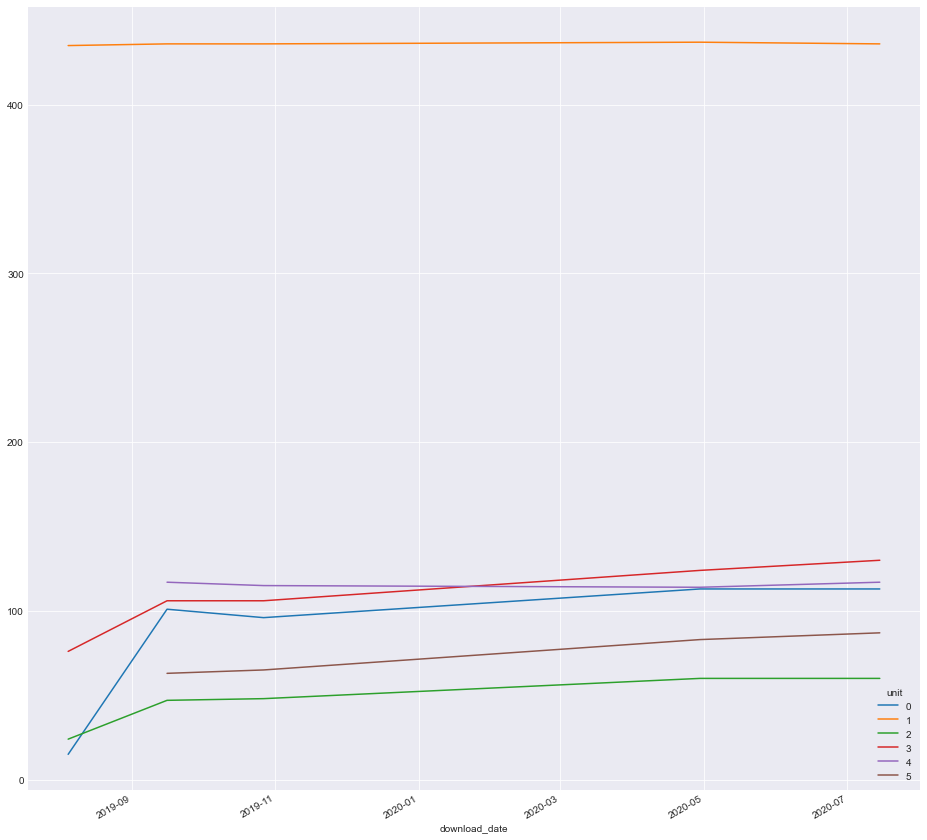

In [22]:
#dfmedian.plot()
#dfavmeta.plot()
dfcometa.plot()

## Plot number of datasets with various numbers of available metadata elements

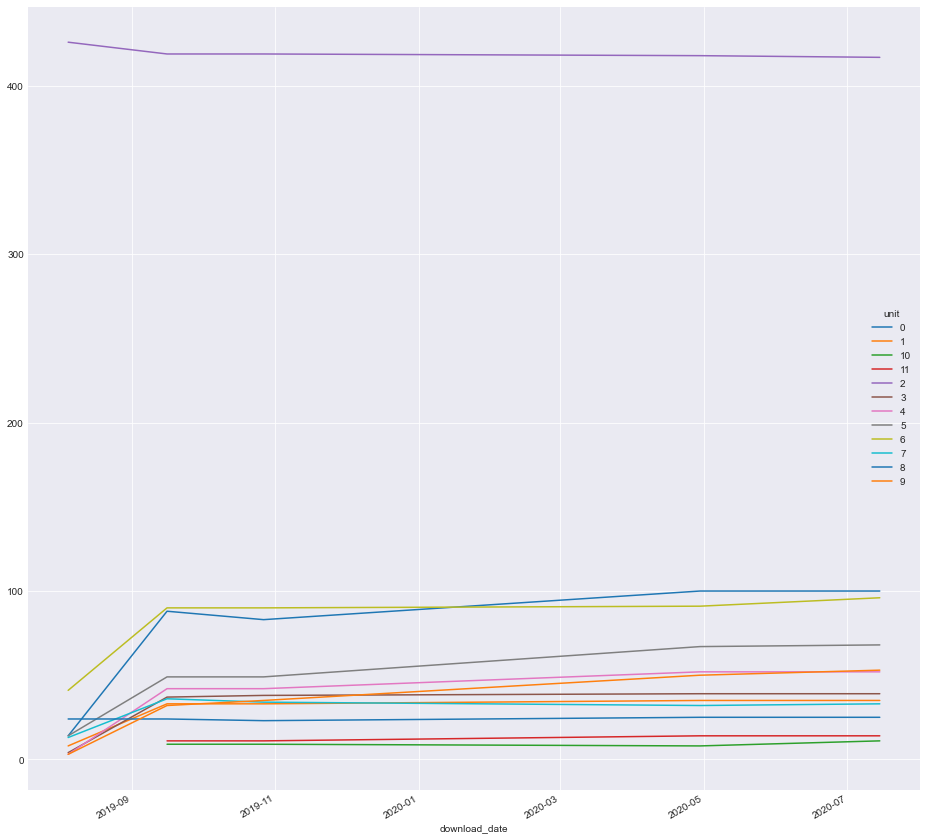

In [23]:
dfavmeta.plot()